## Introduction
Time series forecasting is a critical component of many real-world applications, from finance and stock market prediction to weather forecasting and demand forecasting in supply chain management. Accurate and reliable predictions of future values based on historical data can provide invaluable insights for decision-making and planning. In the realm of time series forecasting, the Quantum Long Short-Term Memory (QLSTM) neural network architecture has emerged as a powerful tool for handling sequential data.

The QLSTM is a variant of the widely used Long Short-Term Memory (LSTM) network, designed to capture both short-term and long-term dependencies in time series data. It combines the strengths of traditional LSTMs with certain enhancements, making it particularly well-suited for complex and chaotic time series datasets. This innovative architecture has shown promising results in a variety of domains, making it a go-to choice for data scientists and researchers aiming to harness the predictive potential of neural networks.

In this codebase, we present a comprehensive implementation of the QLSTM neural network for time series forecasting. This code is intended to serve as a versatile and user-friendly tool for practitioners and researchers looking to leverage QLSTMs for their forecasting tasks. Whether you are an experienced deep learning expert or just getting started with neural networks, this codebase will provide you with the necessary tools and resources to:

0.- Preprocess Time Series Data: Clean, format, and prepare your time series data for training and evaluation.

1.- Build the QLSTM Model: Create a robust QLSTM architecture tailored to your specific forecasting problem. You can customize hyperparameters, network layers, and activation functions to suit your needs.

2.- Train the Model: Utilize historical time series data to train the QLSTM network. The code supports various training options, including batch size, learning rate, and early stopping to ensure efficient convergence.

3.- Evaluate Model Performance: Assess the accuracy and effectiveness of the QLSTM model by measuring metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE).

4.- Generate Forecasts: Use the trained QLSTM model to make future predictions, allowing you to gain insights into future trends and patterns in your time series data.

5.- Visualize Results: Visualize the model's predictions alongside the actual time series data, enabling you to gain a deeper understanding of its forecasting capabilities.

By providing this QLSTM time series forecasting codebase, we aim to empower users to tackle a wide range of forecasting challenges effectively. Whether you are interested in predicting stock prices, energy consumption, or any other time-dependent phenomenon, the QLSTM codebase offers a powerful and flexible solution to enhance your forecasting endeavors. With the right data and the right model, you can unlock valuable insights and make informed decisions in your domain of interest.

In the following experiments we test this tool for common functions such as $f(t) = sin(t)$, $f(t) = 2t^3 + 5t^2 +8t -9 $ (polynomials), time series for economic indexes, etc.

We based this code in the paper Quantum Long Short-Term Memory: https://arxiv.org/pdf/2009.01783.pdf, Samuel Yen-Chi Chen, Shinjae Yoo, and Yao-Lung L. Fang.


In [1]:
pip install --force-reinstall pennylane==0.29.0

  Using cached PennyLane-0.29.0-py3-none-any.whl (1.3 MB)
  Using cached numpy-1.23.5-cp311-cp311-win_amd64.whl (14.6 MB)
  Obtaining dependency information for scipy from https://files.pythonhosted.org/packages/06/15/e73734f9170b66c6a84a0bd7e03586e87e77404e2eb8e34749fc49fa43f7/scipy-1.11.2-cp311-cp311-win_amd64.whl.metadata
  Using cached scipy-1.11.2-cp311-cp311-win_amd64.whl.metadata (59 kB)
  Using cached networkx-3.1-py3-none-any.whl (2.1 MB)
  Obtaining dependency information for retworkx from https://files.pythonhosted.org/packages/96/e4/3fbaf64d7a891cff6bf0761546fedb0551b2a0efe132459984f85fcc4fa0/retworkx-0.13.1-py3-none-any.whl.metadata
  Using cached retworkx-0.13.1-py3-none-any.whl.metadata (10 kB)
  Obtaining dependency information for autograd from https://files.pythonhosted.org/packages/81/70/d5c7c2a458b8be96495c8b1634c2155beab58cbe864b7a9a5c06c2e52520/autograd-1.6.2-py3-none-any.whl.metadata
  Using cached autograd-1.6.2-py3-none-any.whl.metadata (706 bytes)
  Using cach

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [8]:
pip install torch

     ---------------------------------------- 0.0/172.3 MB ? eta -:--:--
     ---------------------------------------- 0.0/172.3 MB ? eta -:--:--
     ---------------------------------------- 0.0/172.3 MB ? eta -:--:--
     -------------------------------------- 0.0/172.3 MB 186.2 kB/s eta 0:15:26
     -------------------------------------- 0.0/172.3 MB 196.9 kB/s eta 0:14:35
     -------------------------------------- 0.1/172.3 MB 272.3 kB/s eta 0:10:33
     -------------------------------------- 0.1/172.3 MB 385.0 kB/s eta 0:07:28
     -------------------------------------- 0.2/172.3 MB 482.7 kB/s eta 0:05:57
     -------------------------------------- 0.2/172.3 MB 512.0 kB/s eta 0:05:37
     -------------------------------------- 0.2/172.3 MB 576.2 kB/s eta 0:04:59
     -------------------------------------- 0.3/172.3 MB 631.2 kB/s eta 0:04:33
     -------------------------------------- 0.3/172.3 MB 675.6 kB/s eta 0:04:15
     -------------------------------------- 0.4/172.3 MB 732.

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [9]:
import helper
import pennylane
import pandas as pd
import time
import numpy as np
import math
import matplotlib.pyplot as plt
import torch

from torch import *
from torch import nn
from torch.utils.data import DataLoader
from IPython.display import Image


### Preprocess Time Series Data

Read the data and remove the Date and Unnamed column from the csv.

In [10]:
df = pd.read_csv('dataset_stockPrices.csv')
df = df.drop(['Date' ,'Unnamed: 0'], axis=1)
df

,Close,Volume,ma7,ma21,26ema,12ema,MACD,20sd,upper_band,lower_band,...,GSK,LLY,NVS,NYSE,NASDAQ,FT3,FT6,FT9,ARIMA,Close_lead1
0,31.011450,14227229,30.050436,29.200291,29.514006,29.867322,0.353316,0.835852,30.871996,27.528586,...,20.441219,22.546120,26.214659,6671.140137,2017.979980,55.454947,50.337802,47.947327,31.011450,31.440840
1,31.440840,20081566,30.318975,29.299346,29.688906,30.115697,0.426791,0.963549,31.226444,27.372247,...,20.290920,22.639698,26.532934,6697.220215,2024.229980,55.359252,50.140845,47.659130,31.440840,31.183207
2,31.183207,10438080,30.564340,29.420211,29.822316,30.283528,0.461212,1.026446,31.473102,27.367319,...,20.280550,22.492653,26.608170,6687.939941,2024.430054,55.263482,49.944470,47.372320,31.183207,31.364504
3,31.364504,10302154,30.858779,29.556525,29.957940,30.452906,0.494965,1.086420,31.729366,27.383684,...,20.513784,22.800129,26.984316,6722.310059,2027.729980,55.167638,49.748691,47.086936,31.364504,30.839695
4,30.839695,12640452,30.973283,29.664667,30.034423,30.513340,0.478916,1.094567,31.853801,27.475534,...,20.285738,22.459227,26.857002,6709.040039,2028.770020,55.071723,49.553518,46.803017,30.839695,30.944656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2712,78.301529,13675457,75.931026,74.702836,75.305196,75.725497,0.420300,1.705192,78.113220,71.292452,...,38.856968,148.141144,82.393753,12302.190430,9682.910156,57.910147,55.622779,55.790021,76.887436,77.814888
2713,77.814888,9292930,76.515814,74.863687,75.491099,76.046941,0.555842,1.816324,78.496336,71.231038,...,38.423382,146.373550,81.836136,12286.980469,9615.809570,57.817099,55.415062,55.480641,78.191500,78.492363
2714,78.492363,10413347,77.157852,75.097238,75.713415,76.423160,0.709745,1.857931,78.813100,71.381377,...,38.469505,144.916718,82.576424,12641.440430,9814.080078,57.723926,55.207594,55.171523,77.972240,79.103050
2715,79.103050,9956838,77.684024,75.428935,75.964499,76.835451,0.870952,1.960788,79.350511,71.507360,...,39.087601,144.916718,82.364914,12836.599609,9924.750000,57.630627,55.000389,54.862711,78.309688,78.492363


We identify the dependent and independent variables:

In [13]:
target = "Close_lead1"

In [14]:
features = list(df.columns.difference(["Close", 'Close_lead1']))
features

['12ema',
 '20sd',
 '26ema',
 'AMGN',
 'ARIMA',
 'BMY',
 'FT3',
 'FT6',
 'FT9',
 'GSK',
 'JNJ',
 'LLY',
 'MACD',
 'NASDAQ',
 'NVS',
 'NYSE',
 'PFE',
 'SNP',
 'SNY',
 'VTRS',
 'VZ',
 'Volume',
 'ema',
 'log_momentum',
 'lower_band',
 'ma21',
 'ma7',
 'momentum',
 'neg',
 'neu',
 'pos',
 'upper_band']

### Data Processing

To preprocess the data, we initiate the procedure by partitioning it into training and testing datasets. Specifically, we allocate two-thirds of the data for the training set, while reserving the remaining one-third for the testing set.

In [11]:
training_percentage = 0.67
size = int(len(df) * training_percentage)

df_train = df.loc[:size].copy()
df_test = df.loc[size:].copy()

Subsequently, to mitigate the potential dominance of certain values within the features due to their magnitude, we *standardize* the data.

In [15]:
target_mean = df_train[target].mean()
target_stdev = df_train[target].std()

for c in df_train.columns:
    mean = df_train[c].mean()
    stdev = df_train[c].std()

    df_train[c] = (df_train[c] - mean) / stdev
    df_test[c] = (df_test[c] - mean) / stdev

In [16]:
from Factory import SequenceDataset

Lastly, the final stage in data processing, essential for LSTM preparation, involves organizing the data into a sequence of historical observations. For LSTM to effectively operate on time series data, it relies on utilizing a specific number of past observations to make future predictions. In our scenario, the sequence length determines the extent of historical context considered by the LSTM in forecasting. Having $n$ data, the LSTM can predict the next step ($n+1$) time series data. 

In [20]:
torch.manual_seed(101) #Sets the seed for generating random numbers.

batch_size = 1
sequence_length = 3

train_dataset = SequenceDataset(
    df_train,
    target=target,
    features=features,
    sequence_length=sequence_length
)
test_dataset = SequenceDataset(
    df_test,
    target=target,
    features=features,
    sequence_length=sequence_length
)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

X, y = next(iter(train_loader))

print("Features shape:", X.shape)
print("Target shape:", y.shape)

Features shape: torch.Size([1, 3, 32])
Target shape: torch.Size([1])


### Training classical LSTM

We define the following training methods:

train_model: This function is designed for model training using data batches.
test_model: This function is tailored for evaluating the model's performance on the testing data.

We display the loss metric as a diagnostic tool to measure the model's performance in relation to the provided data.

In [21]:
def train_model(data_loader, model, loss_function, optimizer):
    num_batches = len(data_loader)
    total_loss = 0
    model.train()

    for X, y in data_loader:
        output = model(X)
        loss = loss_function(output, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    avg_loss = total_loss / num_batches
    print(f"Train loss: {avg_loss}")
    return avg_loss

def test_model(data_loader, model, loss_function):

    num_batches = len(data_loader)
    total_loss = 0

    model.eval()
    with torch.no_grad():
        for X, y in data_loader:
            output = model(X)
            total_loss += loss_function(output, y).item()

    avg_loss = total_loss / num_batches
    print(f"Test loss: {avg_loss}")
    return avg_loss

### Running the Classical LSTM

To gain insight into our QLSTM implementation, we'll start by elucidating our LSTM implementation. The LSTM architecture adheres to the following structure:
</br>
<img src="lstm2.jpg" alt="drawing" width="400"/>
Quantum Long Short-Term Memory, https://arxiv.org/pdf/2009.01783.pdf (Samuel Yen-Chi Chen, Shinjae Yoo, and Yao-Lung L. Fang (2020))

In straightforward terms, an LSTM employs a structure composed of four distinct neural network layers within each LSTM cell. These layers are as follows:

1.- Forget Layer </br>
2.- Input Layer </br>
3.- Update Layer </br>
4.- Output Layer </br>

You can observe these corresponding layers within the "W" cells illustrated in the diagram above. While we won't delve into the intricate technicalities here, it's crucial to recognize that these four layers constitute the fundamental components of an LSTM neural network model. These layers typically resemble conventional neural network layers, such as linear layers with rectified linear unit (ReLU) activations or convolutional layers.

In the upcoming code section, we ilutrate the training of an LSTM model with the objective of forecasting future stock prices. Subsequently, we assess its performance on the test dataset. The selection of a learning rate of 0.0001 has been a product of careful experimentation, where we identified the learning rate that consistently delivered precise results. In terms of training, we opt for a total of 20 epochs, a number we deemed adequate for achieving convergence and fulfilling the goals outlined in this notebook. Following training, we proceed to visualize three distinct graphs:

* A comparison plot that illustrates the model's predictions against actual stock prices.
* A graphical representation depicting the progression of test loss and training loss across epochs.

In [22]:
from utils import ShallowRegressionLSTM

In [23]:
learning_rate = 0.0001
num_hidden_units = 16

model = ShallowRegressionLSTM(num_sensors=len(features), hidden_units=num_hidden_units)
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [24]:
classical_loss_train = []
classical_loss_test = []
print("Untrained test\n--------")
test_loss = test_model(test_loader, model, loss_function)
print()
classical_loss_test.append(test_loss)

for ix_epoch in range(0,21):
  print(f"Epoch {ix_epoch}\n---------")
  train_loss = train_model(train_loader, model, loss_function, optimizer=optimizer)
  test_loss = test_model(test_loader, model, loss_function)
  classical_loss_train.append(train_loss)
  classical_loss_test.append(test_loss)


Untrained test
--------
Test loss: 8.610089974459198

Epoch 0.0
---------


C:\Users\Usuario\AppData\Local\Temp\ipykernel_3052\958950701.py:8: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  for ix_epoch in range(0,21):


Train loss: 0.2653262448187357
Test loss: 2.6338869232546402
Epoch 1.0
---------
Train loss: 0.03469269318470698
Test loss: 2.0061179035710284
Epoch 2.0
---------
Train loss: 0.017827948982110514
Test loss: 1.7888868542208582
Epoch 3.0
---------
Train loss: 0.011995089572995091
Test loss: 1.6140610899531145
Epoch 4.0
---------
Train loss: 0.009455384600385065
Test loss: 1.5142773796596458
Epoch 5.0
---------
Train loss: 0.008296079437547552
Test loss: 1.4813240757145605
Epoch 6.0
---------
Train loss: 0.007585738907560235
Test loss: 1.4178956959720537
Epoch 7.0
---------
Train loss: 0.007150697189635071
Test loss: 1.4101455155809095
Epoch 8.0
---------
Train loss: 0.006693863737311884
Test loss: 1.3786948833800796
Epoch 9.0
---------
Train loss: 0.006252353452198051
Test loss: 1.3218227204078945
Epoch 10.0
---------
Train loss: 0.006051007234482822
Test loss: 1.3044836370270942
Epoch 11.0
---------
Train loss: 0.005730820520231037
Test loss: 1.2836491049595429
Epoch 12.0
---------
Trai

Subsequently, we utilize the trained model to make predictions on the test dataset, followed by a thorough comparison of the predicted values with the actual ground truth values.

In [25]:
def predict(data_loader, model):
    output = torch.tensor([])
    model.eval()
    with torch.no_grad():
        for X, _ in data_loader:
            y_star = model(X)
            output = torch.cat((output, y_star), 0)

    return output

In [26]:
train_eval_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)

ystar_col = "Model forecast"
df_train[ystar_col] = predict(train_eval_loader, model).numpy()
df_test[ystar_col] = predict(test_loader, model).numpy()

df_out = pd.concat((df_train, df_test))[[target, ystar_col]]

for c in df_out.columns:
    df_out[c] = df_out[c] * target_stdev + target_mean

print(df_out)

      Close_lead1  Model forecast
0       31.440840       30.782759
1       31.183207       30.853790
2       31.364504       31.018036
3       30.839695       31.142879
4       30.944656       30.962923
...           ...             ...
2712    77.814888       62.619530
2713    78.492363       62.696144
2714    79.103050       62.831009
2715    78.492363       62.947685
2716    78.024811       62.893097

[2718 rows x 2 columns]


C:\Users\Usuario\AppData\Local\Temp\ipykernel_3052\875173430.py:2: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  plt.plot(range(0,2717), df_out["Close_lead1"], label = "Real")
C:\Users\Usuario\AppData\Local\Temp\ipykernel_3052\875173430.py:3: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  plt.plot(range(0,2717), df_out["Model forecast"], label = "LSTM Prediction")


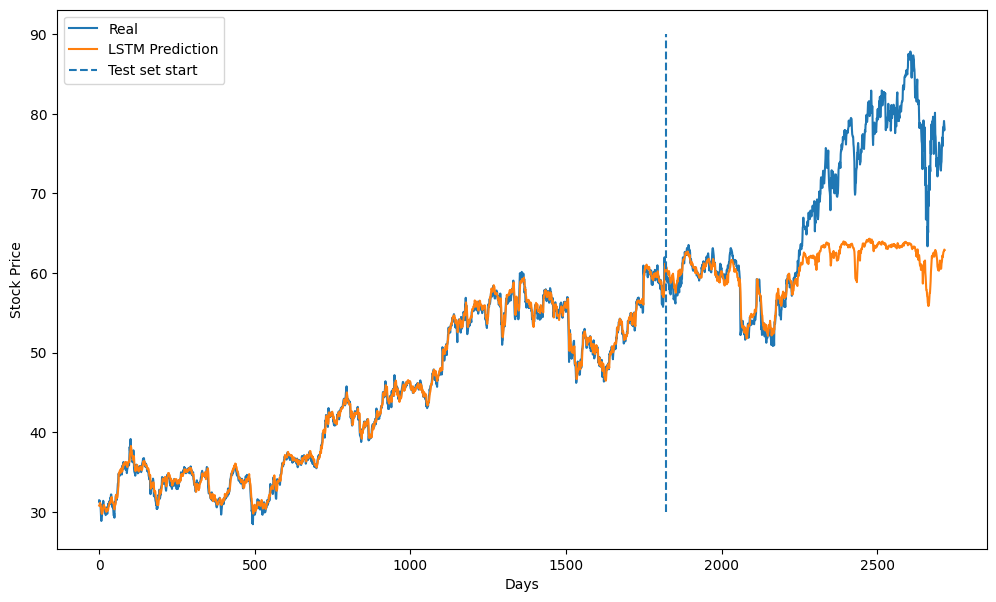

In [27]:
plt.figure(figsize=(12, 7))
plt.plot(range(0,2717), df_out["Close_lead1"], label = "Real")
plt.plot(range(0,2717), df_out["Model forecast"], label = "LSTM Prediction")
plt.ylabel('Stock Price')
plt.xlabel('Days')
plt.vlines(size, ymin = 30, ymax = 90, label = "Test set start", linestyles = "dashed")
plt.legend()
plt.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_3052\2131256969.py:2: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  plt.plot(range(0, 22), classical_loss_test)


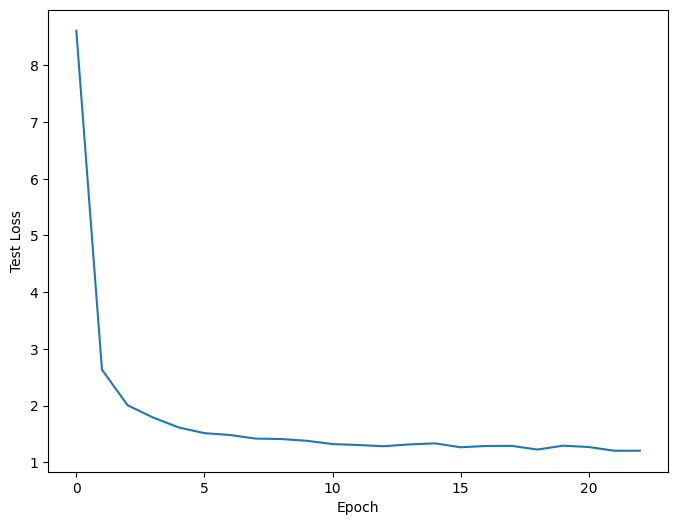

In [28]:
plt.figure(figsize=(8, 6))
plt.plot(range(0, 22), classical_loss_test)
plt.ylabel('Test Loss')
plt.xlabel('Epoch')
plt.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_3052\1382818532.py:2: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  plt.plot(range(0, 21), classical_loss_train)


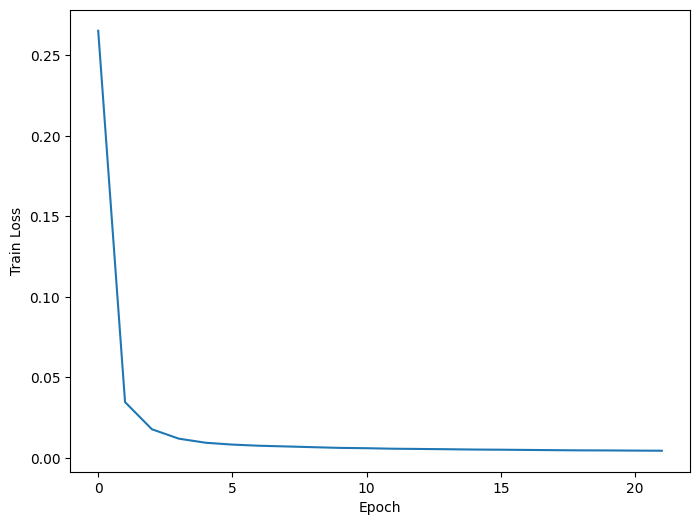

In [29]:
plt.figure(figsize=(8, 6))
plt.plot(range(0, 21), classical_loss_train)
plt.ylabel('Train Loss')
plt.xlabel('Epoch')
plt.show()

### Running the Quantum-LSTM

To implement QLSTM, we then replace the 4 key layers of the LSTM with variational quantum layers enabled by Pennylane. The variational quantum layers are based on the following variational quantum circuits.
<br/>
<br/>
QLSTM model: <br/>
<img src="QLSTM.PNG" alt="drawing" width="600"/>
<br/>
VQC: <br/>
<img src="vqc.jpg" alt="drawing" width="600"/>

Quantum Long Short-Term Memory, https://arxiv.org/pdf/2009.01783.pdf. By Samuel Yen-Chi Chen, Shinjae Yoo, and Yao-Lung L. Fang

As a consequence, the parameters subject to training are now the rotational parameters embedded within the quantum circuits, thereby giving rise to a hybrid quantum-classical neural network layer (with the optimizer being classical in nature). In the QLSTM research paper, the authors demonstrate that QLSTM exhibits superior trainability by "acquiring significantly more information than LSTM right from the outset of the first training epoch, and its loss diminishes more consistently and rapidly than that of its classical counterpart". Consequently, the aim of this study is to substantiate that QLSTM possesses the potential to surpass its classical counterpart in terms of accuracy and the rate at which it learns with each epoch.

While we have repurposed and made certain modifications to adapt it to our specific requirements, such as aligning it with the variational quantum circuits depicted above, we have also harnessed the built-in Pennylane simulator to execute these variational quantum circuits.

In the subsequent code section, our objective is to train a QLSTM model designed to forecast MRK stock prices. This exercise serves as a proof of concept, demonstrating that QLSTM not only holds potential for stock price prediction but also offers advantages over its classical counterpart. Our chosen configuration consists of 4 qubits, a single variational layer, and a learning rate of 0.05. The decision to employ 4 qubits was motivated by our desire to showcase its feasibility even with a limited number of qubits, while the latter two parameters were determined through experimentation over a few epochs to ascertain which settings yielded the most favorable results. Following training, we proceed to visualize three distinct graphs akin to those presented in the classical example.

In [30]:
from utils import QShallowRegressionLSTM

In [31]:
learning_rate = 0.05
num_hidden_units = 16

Qmodel = QShallowRegressionLSTM(num_sensors=len(features), hidden_units=num_hidden_units, n_qubits=4)
loss_function = nn.MSELoss()
optimizer = torch.optim.Adagrad(Qmodel.parameters(), lr=learning_rate)

weight_shapes = (n_qlayers, n_vrotations, n_qubits) = (1, 3, 4)


In [33]:
quantum_loss_train = []
quantum_loss_test = []
print("Untrained test\n--------")
start = time.time()
test_loss = test_model(test_loader, Qmodel, loss_function)
end = time.time()
print("Execution time", end - start)
quantum_loss_test.append(test_loss)

for ix_epoch in range(0, 2):
    print(f"Epoch {ix_epoch}\n---------")
    start = time.time()
    train_loss = train_model(train_loader, Qmodel, loss_function, optimizer=optimizer)
    test_loss = test_model(test_loader, Qmodel, loss_function)
    end = time.time()
    print("Execution time", end - start)
    quantum_loss_train.append(train_loss)
    quantum_loss_test.append(test_loss)

Untrained test
--------
Test loss: 7.388531392035277
Execution time 145.990394115448
Epoch 0.0
---------


C:\Users\Usuario\AppData\Local\Temp\ipykernel_3052\3354073610.py:10: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  for ix_epoch in range(0, 2):


Train loss: 0.03618190253660894
Test loss: 1.491874846934657
Execution time 631.8001766204834
Epoch 1.0
---------
Train loss: 0.006702999543439501
Test loss: 1.4095313486449659
Execution time 643.8683760166168
Epoch 2.0
---------


In [ ]:
train_eval_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)

ystar_col_Q = "Model forecast"
df_train[ystar_col_Q] = predict(train_eval_loader, Qmodel).numpy()
df_test[ystar_col_Q] = predict(test_loader, Qmodel).numpy()

df_out_Q = pd.concat((df_train, df_test))[[target, ystar_col_Q]]

for c in df_out_Q.columns:
    df_out_Q[c] = df_out_Q[c] * target_stdev + target_mean

print(df_out_Q)

      Close_lead1  Model forecast
0       31.440840       30.590168
1       31.183207       30.895592
2       31.364504       30.842838
3       30.839695       30.994576
4       30.944656       30.703695
...           ...             ...
2712    77.814888       62.424202
2713    78.492363       62.400021
2714    79.103050       62.514671
2715    78.492363       62.403915
2716    78.024811       62.477947

[2718 rows x 2 columns]


In [ ]:
plt.figure(figsize=(12, 7))
plt.plot(range(2718), df_out_Q["Close_lead1"], label = "Real")
plt.plot(range(2718), df_out_Q["Model forecast"], label = "QLSTM Prediction")
plt.ylabel('Stock Price')
plt.xlabel('Days')
plt.vlines(size, ymin = 30, ymax = 90, label = "Test set start", linestyles = "dashed")
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(range(21), quantum_loss_test)
plt.ylabel('Test Loss')
plt.xlabel('Epoch')
plt.show()

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(range(1,21), quantum_loss_train)
plt.ylabel('Test Loss')
plt.xlabel('Epoch')
plt.show()

### Comparison between Classical LSTM and QLSTM

Having successfully trained both models and gained initial insights into their performance, our next step involves conducting a comprehensive comparative analysis to gauge their relative effectiveness. This entails a systematic evaluation through the following lenses:

* Comparison of Model Predictions: We juxtapose the predictions generated by both models to discern their respective forecasting capabilities.

* Comparison of Loss Per Epoch: We assess the loss metrics for both training and testing datasets across epochs, providing a nuanced understanding of how the models adapt and generalize.

* Complexity Analysis and Parameter Comparison: We delve into a complexity analysis, scrutinizing factors such as the number of parameters in each model. This scrutiny allows us to quantify and compare the inherent intricacies of the models.

### Comparison of predictions

In [ ]:
plt.figure(figsize=(12, 7))
plt.plot(range(2718), df_out["Close_lead1"], label = "Real")
plt.plot(range(2718), df_out["Model forecast"], label = "LSTM")
plt.plot(range(2718), df_out_Q["Model forecast"], label = "QLSTM")
plt.ylabel('Stock Price')
plt.xlabel('Days')
plt.vlines(size, ymin = 30, ymax = 90, label = "Test set start", linestyles = "dashed")
plt.legend()
plt.show()

As we can see from the graph, it's apparent that both the LSTM and QLSTM models yield similar outcomes. Both models demonstrate exceptional performance in forecasting the training dataset, and during the initial phases of the test dataset, they exhibit remarkable accuracy, closely aligning with the actual values. Moreover, even as they gradually deviate from the ground truth, both models manage to retain some level of fidelity, capturing certain nuances in the data's variation.

### Comparison of evolution of loss values

Now, we want to compare the evolution of the loss values by epoch. So, we compare the evolution of the train loss.

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(range(1,21), classical_loss_train, label = "LSTM")
plt.plot(range(1,21), quantum_loss_train, label = "QLSTM")
plt.ylabel('Train Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

It's noteworthy that QLSTM rapidly accumulates a wealth of information within the initial epochs, surpassing the rate of learning exhibited by LSTM. Additionally, the results converge at a swifter pace in contrast to its classical counterpart, although both models ultimately converge to an adequately low loss value. This observation underscores QLSTM's enhanced trainability and its ability to glean insights more efficiently during the early training phases.

In [ ]:
plt.figure(figsize=(12, 7))
plt.plot(range(21), classical_loss_test, label = "LSTM")
plt.plot(range(21), quantum_loss_test, label = "QLSTM")
plt.ylabel('Test Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

Likewise, when examining the test loss, we observe a consistent pattern. QLSTM outpaces LSTM in assimilating a greater amount of information during the initial epochs and achieves convergence to a lower loss value at a notably accelerated rate. Impressively, QLSTM ultimately reaches an even lower test loss than LSTM, reaffirming its superior trainability. However, it's worth noting that while the loss metrics showcase this distinction, the predictions generated by both models remain reasonably comparable, highlighting the robustness of both approaches.

### Other time series forecasting using QLSTM

#### Sinusoidal function

In the following code we import data from the $f(t) = sin(t)$ function and tran the QLSTM model for predict the sine behaviour. 